In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heat /Data_raw.csv") 


In [ ]:
df

,PM,BL,T,κliq,κp,d,vol%,E
0,Al2O3,EG,20,0.249,27,150,0.5,1.3
1,Al2O3,W,20,0.598,27,150,0.5,1.5
2,Aluminium,EG,20,0.249,204,80,0.1,1.5
3,Al2O3,W,20,0.598,27,45,0.5,2.0
4,Al2O3,W,30,0.616,27,150,0.5,2.5
...,...,...,...,...,...,...,...,...
274,Cu,EG,40,0.256,383,80,3.0,33.0
275,Cu,TO,50,0.108,383,80,2.0,33.0
276,Cu,TO,40,0.109,383,80,3.0,33.0
277,Cu,EG,50,0.258,383,80,3.0,36.0


In [ ]:
df1=pd.DataFrame()

In [ ]:
df1['T'] = df['T']/df['T'].max()

In [ ]:
df.PM[df.PM == 'Al2O3'] = 0
df.PM[df.PM == 'Aluminium'] = 1
df.PM[df.PM == 'CuO'] = 2
df.PM[df.PM == 'Cu'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df.BL[df.BL == 'EG'] = 0
df.BL[df.BL == 'W'] = 1
df.BL[df.BL == 'TO'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df1['κliq']=df['κliq']/df['κliq'].max()
df1['κp']=df['κp']/df['κp'].max()
df1['d']=df['d']/df['d'].max()
df1['vol%']=df['vol%']/df['vol%'].max()
df1['E']=df['E']/df['E'].max()
df1['PM']= df['PM']
df1['BL']= df['BL']

In [ ]:
X = df1[['PM','BL','T', 'κliq','κp','d','vol%' ]] #feature 
y = df1[['E']] # Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splitting the data randomly 

print(np.shape(X_train))
print(np.shape(y_test))


(223, 7)
(56, 1)


In [ ]:
X_test[0:10]

,PM,BL,T,κliq,κp,d,vol%
30,0,1,0.6,0.956522,0.070496,1.000000,0.666667
126,0,2,0.4,0.172360,0.070496,0.300000,1.000000
199,2,1,0.8,0.979814,0.046997,0.206667,1.000000
142,3,1,0.4,0.928571,1.000000,0.533333,0.333333
254,2,0,1.0,0.400621,0.046997,0.206667,1.000000
237,1,0,0.8,0.397516,0.532637,0.533333,0.666667
97,3,0,1.0,0.400621,1.000000,0.533333,0.033333
206,0,0,1.0,0.400621,0.070496,0.300000,1.000000
258,2,2,1.0,0.167702,0.046997,0.206667,1.000000
144,0,0,0.4,0.386646,0.070496,0.073333,0.333333


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
#kernel = 1.0 * RBF(1.0)
#clf = GaussianProcessRegressor(kernel=kernel,random_state=0)


##MY ADDITIONS
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#X_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#clf.fit(X_scaled, y_train)
#print(clf.score(X_scaled, y_train))
#y_pred = clf.predict(X_test_scaled)
#print(y_pred)

kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel = kernel, random_state=0).fit(X_train, y_train)
print("score", reg.score(X_train, y_train))
y_pred = reg.predict(X_test)

print(np.sum(y_test-y_pred))

#kernel = 1.0 * RBF(1.0)
#reg = GaussianProcessRegressor(kernel = kernel, random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

#reg = GaussianProcessRegressor(random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

#from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))




####
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
y_pred

score 0.8111251262040663
E   -0.754856
dtype: float64


array([[0.14065292],
       [0.41655426],
       [0.47006225],
       [0.34247776],
       [0.58005486],
       [0.48016418],
       [0.43794321],
       [0.56140999],
       [0.59489592],
       [0.18814511],
       [0.34631974],
       [0.35131268],
       [0.44134223],
       [0.36862306],
       [0.29879832],
       [0.27245817],
       [0.39298198],
       [0.18171463],
       [0.52128437],
       [0.52183348],
       [0.2211267 ],
       [0.23977157],
       [0.32235187],
       [0.65363873],
       [0.77322135],
       [0.48843139],
       [0.2051246 ],
       [0.12825666],
       [0.07671606],
       [0.27276718],
       [0.27701563],
       [0.28091797],
       [0.11395851],
       [0.43668229],
       [0.45120336],
       [0.16630265],
       [0.50088962],
       [0.42297308],
       [0.00298737],
       [0.24877897],
       [0.172729  ],
       [0.4938293 ],
       [0.27163092],
       [0.22937737],
       [0.303707  ],
       [0.34588748],
       [0.22651142],
       [0.171

In [1]:
import matplotlib.pyplot as plt
plt.scatter(y_test[0:45],y_pred[0:45])
plt.title('Graph between predicted  Value and Expected  Value')
plt.xlabel('Expected Value')
plt.ylabel('Predicted Value')
x=y_test.to_numpy().flatten()
y=y_pred.flatten()
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.show()

NameError: ignored

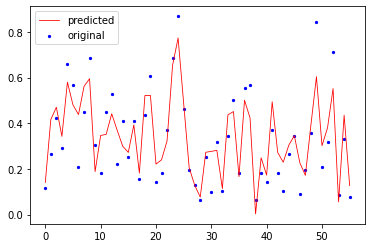

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
#kernel = 1.0 * RBF(1.0)
#clf = GaussianProcessRegressor(kernel=kernel,random_state=0)


##MY ADDITIONS
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#X_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#clf.fit(X_scaled, y_train)
#print(clf.score(X_scaled, y_train))
#y_pred = clf.predict(X_test_scaled)
#print(y_pred)

#kernel = DotProduct() + WhiteKernel()
#reg = GaussianProcessRegressor(kernel = kernel, random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

#kernel = 1.0 * RBF(1.0)
#reg = GaussianProcessRegressor(kernel = kernel, random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

#reg = GaussianProcessRegressor(random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("score", reg.score(X_train, y_train))
y_pred = reg.predict(X_test)

print(np.sum(y_test-y_pred))




####
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
y_pred

score 0.811569639882542
E   -0.753831
dtype: float64


array([[ 1.43887390e-01],
       [ 4.12708747e-01],
       [ 4.75090862e-01],
       [ 3.40727597e-01],
       [ 5.83549507e-01],
       [ 4.79594140e-01],
       [ 4.38511358e-01],
       [ 5.63114153e-01],
       [ 6.00354388e-01],
       [ 1.77803903e-01],
       [ 3.43842714e-01],
       [ 3.49191487e-01],
       [ 4.40252029e-01],
       [ 3.68403358e-01],
       [ 2.94138442e-01],
       [ 2.70728189e-01],
       [ 3.93866234e-01],
       [ 1.73747327e-01],
       [ 5.28913216e-01],
       [ 5.24268887e-01],
       [ 2.17565351e-01],
       [ 2.38000705e-01],
       [ 3.22744200e-01],
       [ 6.51109687e-01],
       [ 7.77747171e-01],
       [ 4.88880863e-01],
       [ 2.02216341e-01],
       [ 1.24170544e-01],
       [ 7.20094824e-02],
       [ 2.74347755e-01],
       [ 2.76503846e-01],
       [ 2.84680402e-01],
       [ 1.20855958e-01],
       [ 4.35345887e-01],
       [ 4.53146853e-01],
       [ 1.62874230e-01],
       [ 5.03315814e-01],
       [ 4.26462028e-01],
       [-8.8

In [ ]:
print(reg.predict([[	3,0,0.5,	0.936522,	0.080496,	0.9999,	0.666667]])*df['E'].max()) # Value predicted by the model 

[[5.26820184]]


In [ ]:
l=y_test.to_numpy().flatten()

In [ ]:
MSE = ((y_pred-l)**2).mean()
MSE

0.06852574179086726

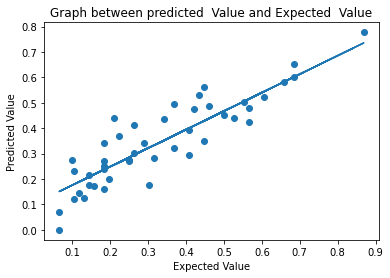

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test[0:45],y_pred[0:45])
plt.title('Graph between predicted  Value and Expected  Value')
plt.xlabel('Expected Value')
plt.ylabel('Predicted Value')
x=y_test.to_numpy().flatten()
y=y_pred.flatten()
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.show()

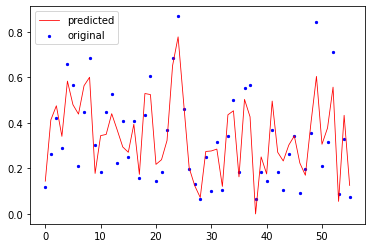

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
#kernel = 1.0 * RBF(1.0)
#clf = GaussianProcessRegressor(kernel=kernel,random_state=0)



#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler()
#X_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#clf.fit(X_scaled, y_train)
#print(clf.score(X_scaled, y_train))
#y_pred = clf.predict(X_test_scaled)
#print(y_pred)

#kernel = DotProduct() + WhiteKernel()
#reg = GaussianProcessRegressor(kernel = kernel, random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
reg = GaussianProcessRegressor(kernel = kernel, random_state=0).fit(X_train, y_train)
print("score", reg.score(X_train, y_train))
y_pred = reg.predict(X_test)

print(np.sum(y_test-y_pred))

#reg = GaussianProcessRegressor(random_state=0).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))

#from sklearn.linear_model import LinearRegression
#reg = LinearRegression(normalize=True).fit(X_train, y_train)
#print("score", reg.score(X_train, y_train))
#y_pred = reg.predict(X_test)

#print(np.sum(y_test-y_pred))




####
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:301: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))


score 0.9999999999999998
E    0.119577
dtype: float64


array([[0.16642403],
       [0.24235187],
       [0.39761811],
       [0.28737631],
       [0.64029213],
       [0.54330839],
       [0.23649586],
       [0.47720623],
       [0.57814958],
       [0.30263158],
       [0.19564072],
       [0.38168267],
       [0.52273133],
       [0.21922341],
       [0.32057684],
       [0.17830716],
       [0.37832041],
       [0.16273786],
       [0.48192973],
       [0.52410219],
       [0.16848662],
       [0.2089413 ],
       [0.36089877],
       [0.63278366],
       [0.89077616],
       [0.40511244],
       [0.209387  ],
       [0.21772901],
       [0.11728987],
       [0.2643721 ],
       [0.11786456],
       [0.31554936],
       [0.14300802],
       [0.3078335 ],
       [0.52903738],
       [0.18705744],
       [0.55997095],
       [0.55958469],
       [0.04370299],
       [0.22382725],
       [0.16235104],
       [0.4133386 ],
       [0.19787145],
       [0.17770834],
       [0.27257358],
       [0.3625689 ],
       [0.06296503],
       [0.207

In [ ]:
print(reg.predict([[	3,0,0.5,	0.936522,	0.080496,	0.9999,	0.666667]])*df['E'].max()) # Predicted value of a random sample 

[[7.92822986]]


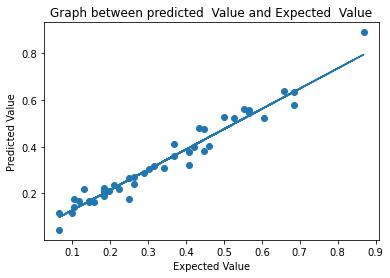

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test[0:45],y_pred[0:45])
plt.title('Graph between predicted  Value and Expected  Value')
plt.xlabel('Expected Value')
plt.ylabel('Predicted Value')
x=y_test.to_numpy().flatten()
y=y_pred.flatten()
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)
plt.show()

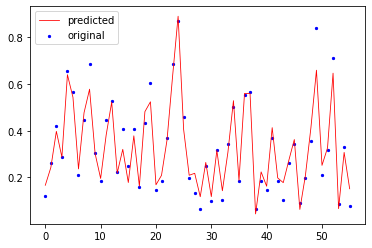

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 


In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test) 

print(clf.predict([[	3,0,0.5,	0.936522,	0.080496,	0.9999,	0.666667]])*df['E'].max())

[5.5105777]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


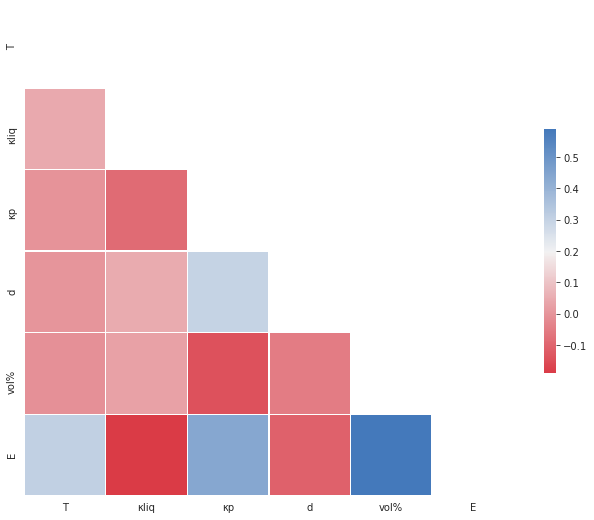

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

corr = df1.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
l=y_test.to_numpy().flatten()

In [ ]:
MSE = ((y_pred-l)**2).mean()
MSE

0.008787487576476464